In [ ]:
from google.colab import files
upload_file = files.upload()

Saving earthquake_1995-2023.csv to earthquake_1995-2023 (1).csv


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('earthquake_1995-2023.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   date_time  1000 non-null   object 
 2   alert      1000 non-null   object 
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   dmin       1000 non-null   float64
 6   gap        1000 non-null   float64
 7   depth      1000 non-null   float64
 8   latitude   1000 non-null   float64
 9   longitude  1000 non-null   float64
 10  location   1000 non-null   object 
 11  continent  1000 non-null   object 
 12  country    1000 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 101.7+ KB


In [ ]:
df.describe(include='object').T

In [ ]:
df.head()

Text(0, 0.5, 'vi do')

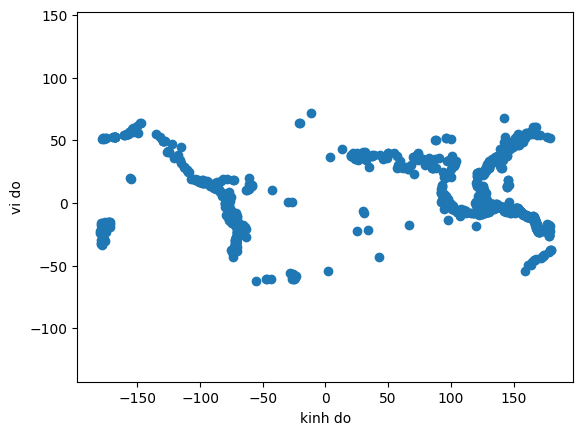

In [ ]:
kinhdo, vido =df['longitude'], df['latitude']

plt.scatter(kinhdo, vido)
plt.axis('equal')
plt.xlabel('kinh do')
plt.ylabel('vi do')

In [ ]:
df.isnull().sum().sum()

1622

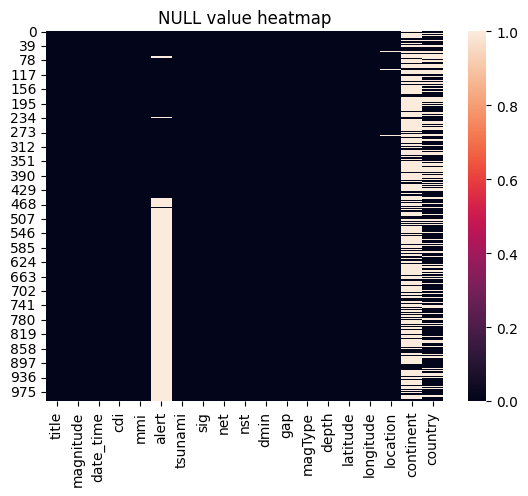

In [ ]:
sns.heatmap(df.isnull(), cbar =True)
plt.title('NULL value heatmap')
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
df['alert'].fillna('undefined:(', inplace =True)


In [ ]:
df['location'].fillna('undefined:(', inplace =True)
df['continent'].fillna('undefined:(', inplace =True)
df['country'].fillna('undefined:(', inplace =True)

In [ ]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16/08/2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",undefined:(,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19/07/2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",undefined:(,undefined:(
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17/07/2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16/07/2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",undefined:(,undefined:(
4,M 7.3 - Alaska Peninsula,7.3,16/07/2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,undefined:(,undefined:(


In [ ]:
df = df.drop(['title'], axis = 1)
df = df.drop(['cdi'], axis = 1)
df = df.drop(['mmi'], axis = 1)
df = df.drop(['net'], axis = 1)
df = df.drop(['nst'], axis = 1)
df = df.drop(['magType'], axis = 1)

In [ ]:
features = df.drop('tsunami', axis =1)
labels = df['tsunami']

In [ ]:
features

,magnitude,date_time,alert,sig,dmin,gap,depth,latitude,longitude,location,continent,country
0,6.5,16/08/2023 12:47,green,657,7.177000,25.0,192.955,-13.8814,167.1580,"Sola, Vanuatu",undefined:(,Vanuatu
1,6.5,19/07/2023 00:22,yellow,775,0.679000,40.0,69.727,12.8140,-88.1265,"Intipucá, El Salvador",undefined:(,undefined:(
2,6.6,17/07/2023 03:05,green,899,1.634000,28.0,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,7.2,16/07/2023 06:48,green,860,0.907000,36.0,32.571,54.3844,-160.6990,"Sand Point, Alaska",undefined:(,undefined:(
4,7.3,16/07/2023 06:48,undefined:(,820,0.879451,172.8,21.000,54.4900,-160.7960,Alaska Peninsula,undefined:(,undefined:(
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,27/05/1995 13:03,undefined:(,776,0.000000,0.0,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,7.7,16/05/1995 20:12,undefined:(,912,0.000000,0.0,20.200,-23.0080,169.9000,"Vao, New Caledonia",undefined:(,undefined:(
997,6.9,14/05/1995 11:33,undefined:(,732,0.000000,0.0,11.200,-8.3780,125.1270,"Maubara, Timor Leste",undefined:(,Indonesia
998,6.6,13/05/1995 08:47,undefined:(,670,0.000000,0.0,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


In [ ]:
features.select_dtypes(exclude=['int64', 'float64']).columns

Index(['date_time', 'alert', 'location', 'continent', 'country'], dtype='object')

In [ ]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude = ['int64','float64']).columns)
features_onehot

,magnitude,sig,dmin,gap,depth,latitude,longitude,date_time_1/1/1996 8:05,date_time_1/1/1996 9:57,date_time_1/1/2001 6:57,...,country_Tonga,country_Trinidad and Tobago,country_Turkey,country_Turkiye,country_Turkmenistan,country_United Kingdom of Great Britain and Northern Ireland (the),country_United States of America,country_Vanuatu,country_Venezuela,country_undefined:(
0,6.5,657,7.177000,25.0,192.955,-13.8814,167.1580,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6.5,775,0.679000,40.0,69.727,12.8140,-88.1265,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,6.6,899,1.634000,28.0,171.371,-38.1911,-70.3731,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7.2,860,0.907000,36.0,32.571,54.3844,-160.6990,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,7.3,820,0.879451,172.8,21.000,54.4900,-160.7960,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,776,0.000000,0.0,11.000,52.6290,142.8270,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,7.7,912,0.000000,0.0,20.200,-23.0080,169.9000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,6.9,732,0.000000,0.0,11.200,-8.3780,125.1270,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,6.6,670,0.000000,0.0,14.000,40.1490,21.6950,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_train = features_onehot[:900]
x_test = features_onehot[900:]
y_train = labels[:900]
y_test = labels[900:]

In [ ]:
#import tree
from sklearn import tree

In [ ]:

clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=0)
#train cây quyết định
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#predict the response for test dataset
tree_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("accuracy: ", tree_score)
print("report: ", metrics.classification_report(y_test, tree_pred))

accuracy:  1.0
report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

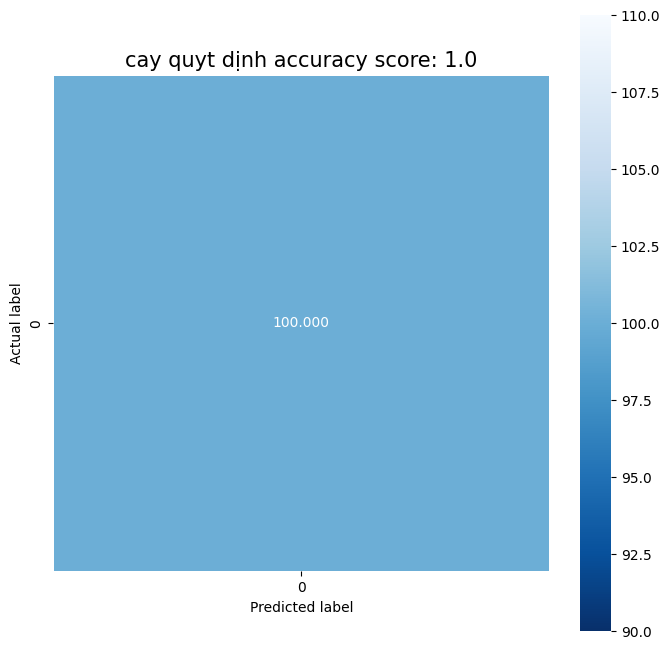

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(tree_cm, annot =True,fmt=".3f", linewidths=.5, square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'cay quyt dịnh accuracy score: {0}'.format(tree_score)
plt.title(title, size=15);

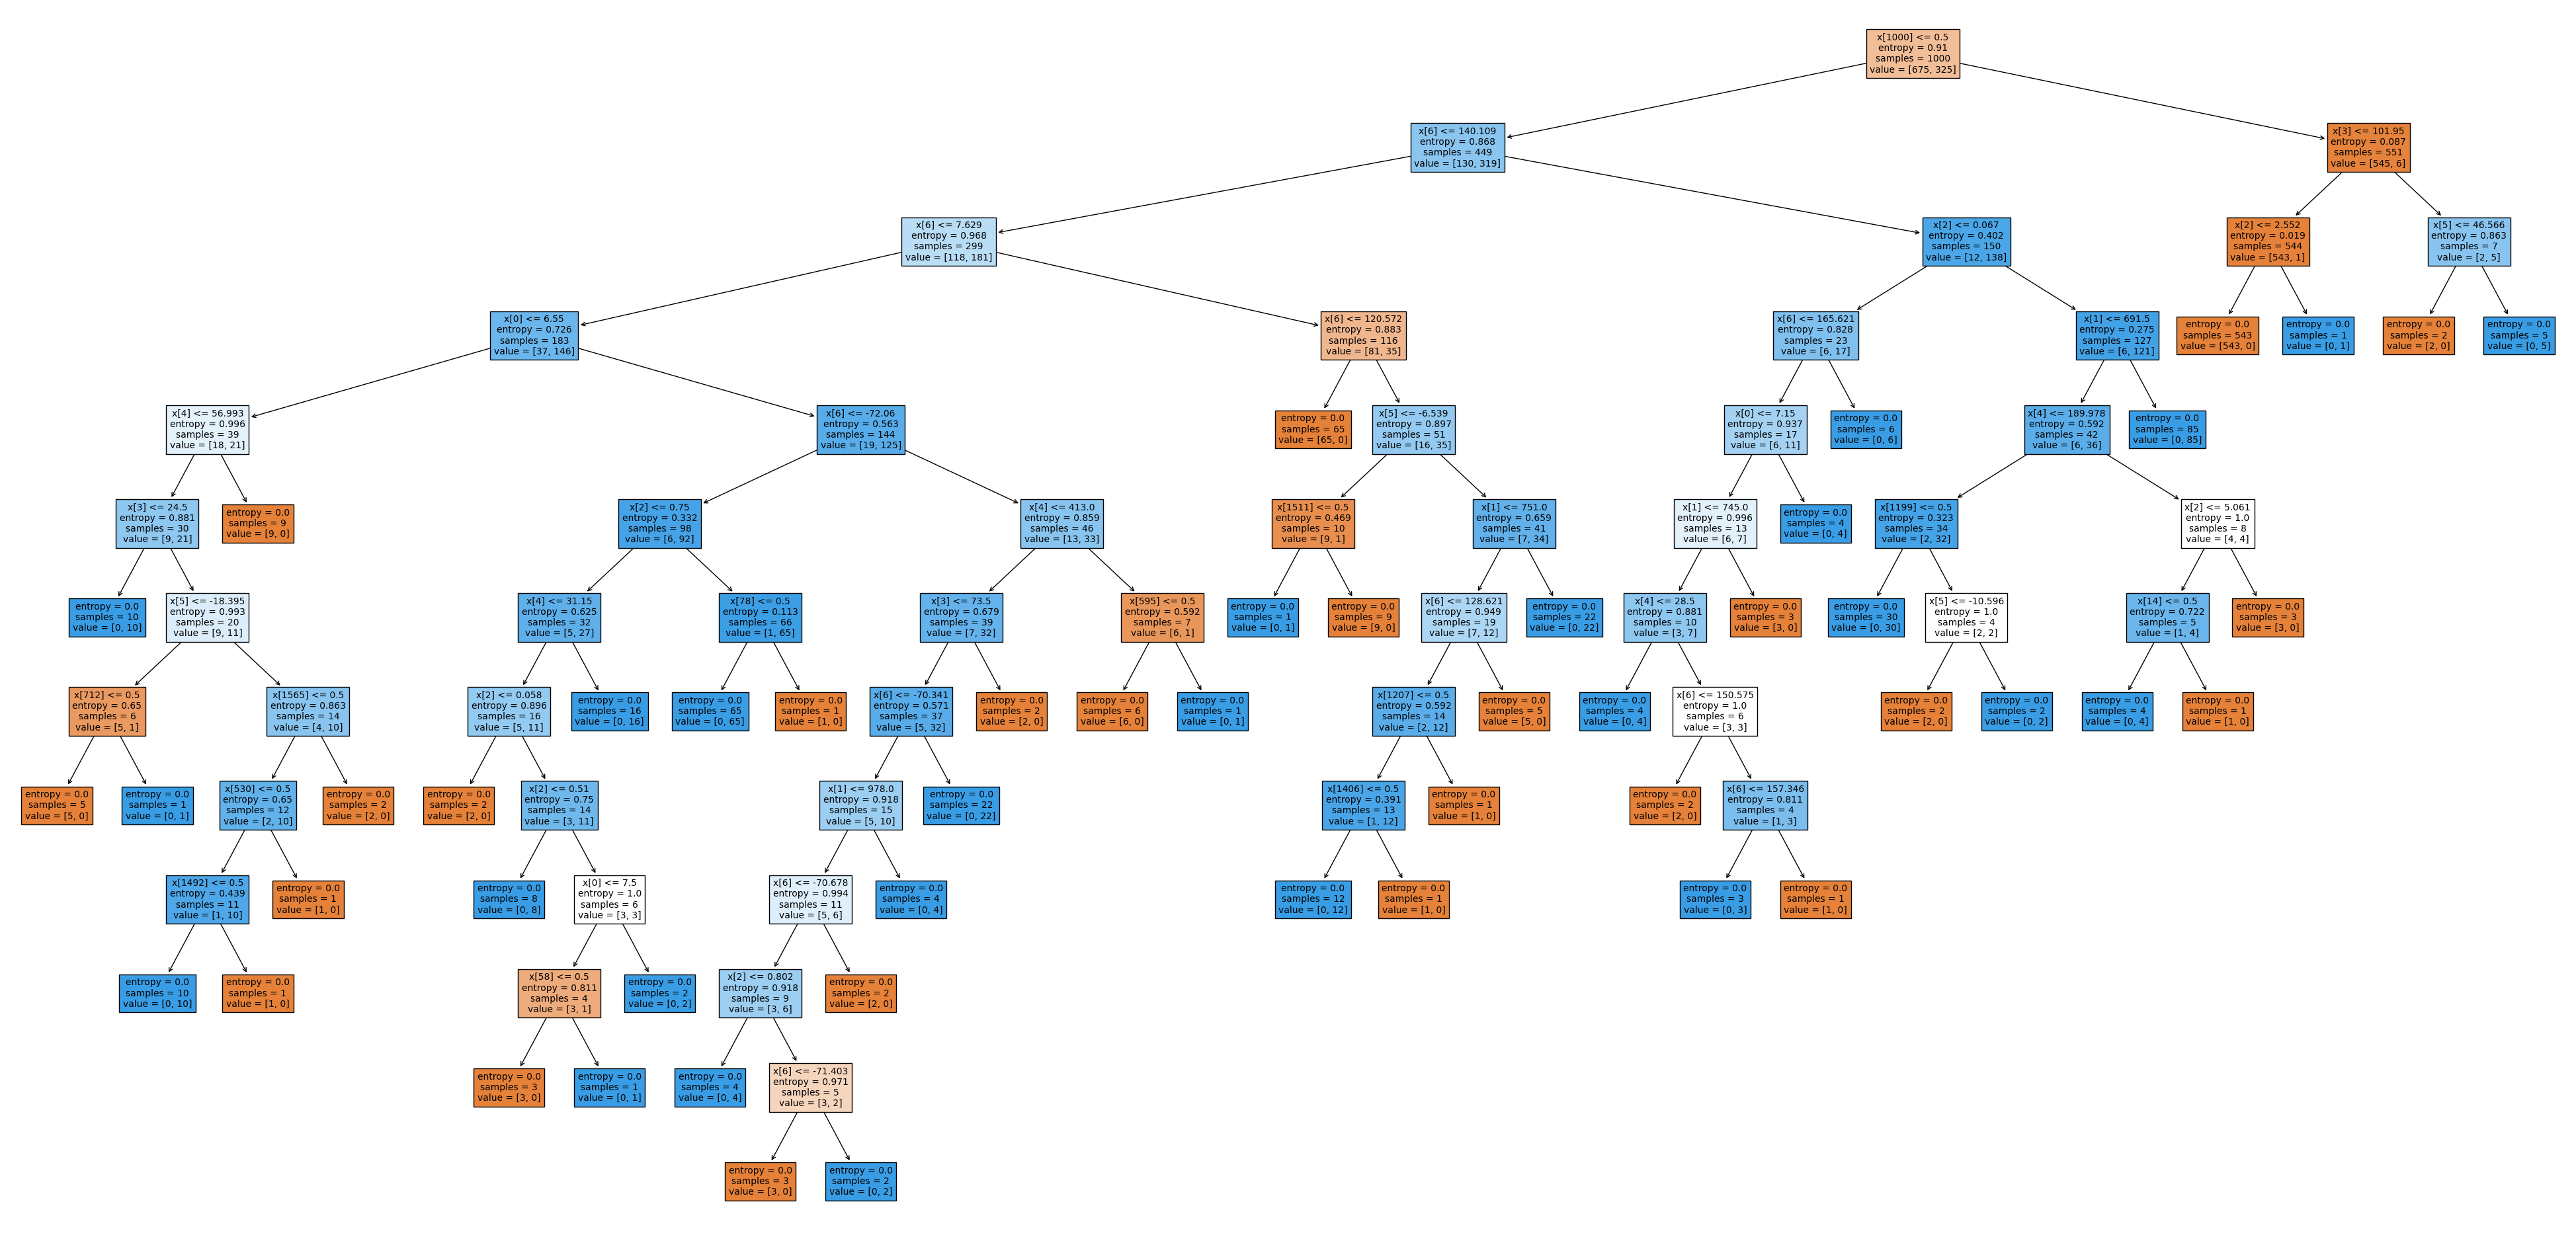

In [ ]:
fig, ax=plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()